# This is a simple note about matplotlib

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib.mlab as mlab
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

%matplotlib inline
fig = plt.gcf()
plt.rcParams["figure.figsize"] = [15, 10]
plt.style.use('ggplot')

In [26]:
x = np.arange(0, 50)
y = np.sin(x) + x

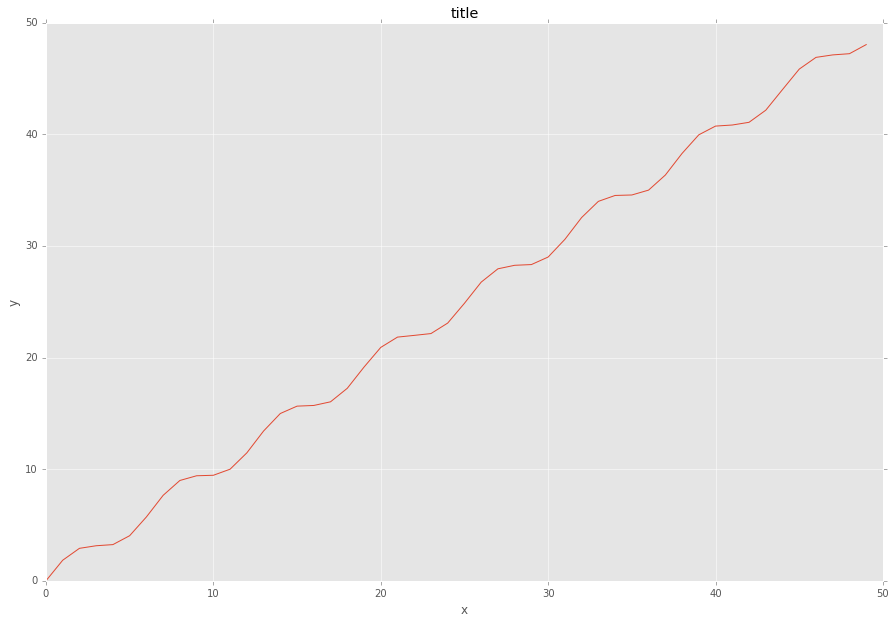

In [27]:
plt.ylabel("y")
plt.xlabel("x")
plt.title("title")
plt.plot(x, y, "-")
plt.show()

# using different format style

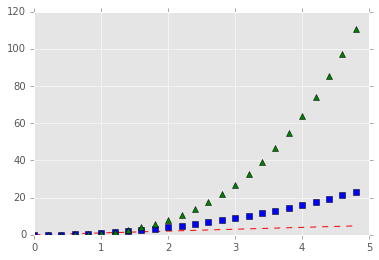

In [141]:
# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

[None, None, None, None]

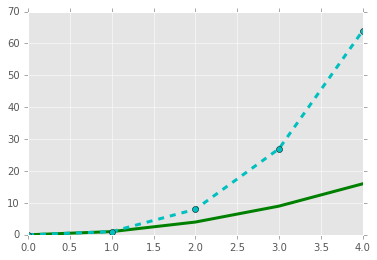

In [142]:
x = np.arange(0, 5, 1)
line, = plt.plot(x, x**2)
line.set_antialiased(True)
plt.setp(line, color='g', linewidth=3.0)
line2, = plt.plot(x, x**3)
plt.setp(line2, color='c', linewidth=3, linestyle='--', marker="o")

# Working with multiple figures and axes

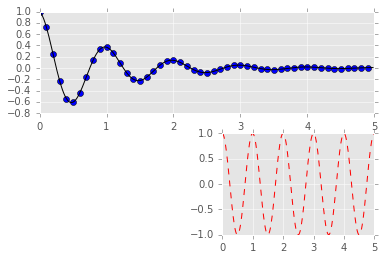

In [143]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(1)
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(224)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

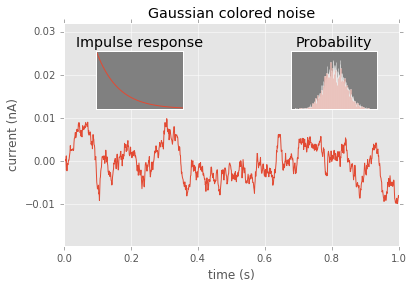

In [144]:
# create some data to use for the plot
dt = 0.001
t = np.arange(0.0, 10.0, dt)
r = np.exp(-t[:1000]/0.05)               # impulse response
x = np.random.randn(len(t))
s = np.convolve(x, r)[:len(x)]*dt  # colored noise

# the main axes is subplot(111) by default
plt.plot(t, s)
plt.axis([0, 1, 1.1*np.amin(s), 2*np.amax(s)])
plt.xlabel('time (s)')
plt.ylabel('current (nA)')
plt.title('Gaussian colored noise')

# this is an inset axes over the main axes
a = plt.axes([.65, .6, .2, .2], axisbg='gray')
n, bins, patches = plt.hist(s, 400, normed=1)
plt.title('Probability')
plt.xticks([])
plt.yticks([])

# this is another inset axes over the main axes
a = plt.axes([0.2, 0.6, .2, .2], axisbg='gray')
plt.plot(t[:len(r)], r)
plt.title('Impulse response')
plt.xlim(0, 0.2)
plt.xticks([])
plt.yticks([])

plt.show()

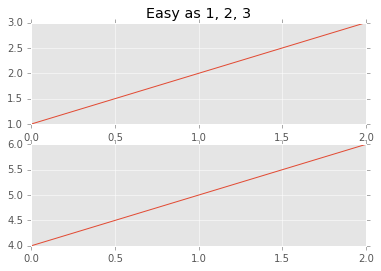

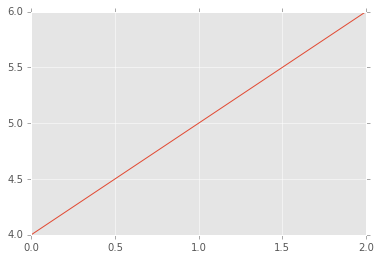

In [145]:
plt.figure(1)                # the first figure
plt.subplot(211)             # the first subplot in the first figure
plt.plot([1, 2, 3])
plt.subplot(212)             # the second subplot in the first figure
plt.plot([4, 5, 6])


plt.figure(2)                # a second figure
plt.plot([4, 5, 6])          # creates a subplot(111) by default

plt.figure(1)                # figure 1 current; subplot(212) still current
plt.subplot(211)             # make subplot(211) in figure1 current
plt.title('Easy as 1, 2, 3') # subplot 211 title

# add some text 

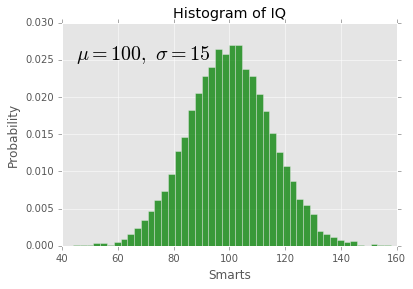

In [146]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(45, .025, r'$\mu=100,\ \sigma=15$', fontsize=20)
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

# use different scale

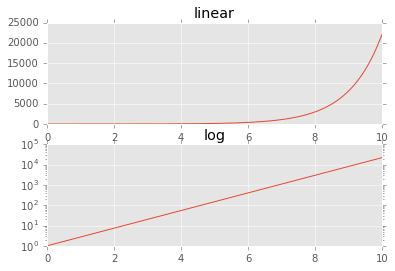

In [147]:
y = np.arange(0, 3, 0.1)
plt.subplot(2, 1, 1)
plt.plot(t, np.exp(t))
plt.title("linear")
plt.subplot(2, 1, 2)
plt.plot(t, np.exp(t))
plt.yscale('log')
plt.title("log")

# Using grid space

## method 1 subplot2grid

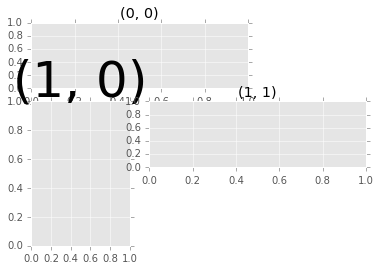

In [148]:
ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
plt.title("(0, 0)")
ax3 = plt.subplot2grid((3, 3), (1, 0), rowspan=2)
plt.title("(1, 0)", fontsize=50)
ax2 = plt.subplot2grid((3, 3), (1, 1), colspan=2)
plt.title("(1, 1)")

## method 2 using grid space

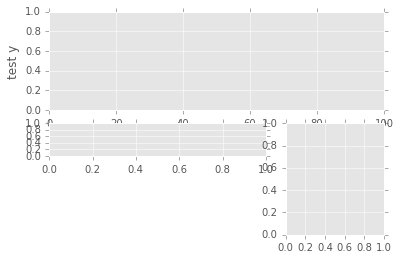

In [149]:
gs = gridspec.GridSpec(3, 3, width_ratios=[1,1, 1], height_ratios=[3, 1, 2])
ax1 = plt.subplot(gs[0,:])
ax2 = plt.subplot(gs[1,:-1])
ax2 = plt.subplot(gs[1:, 2])
ax1.set_xlim(0, 100)
ax1.set_ylabel("test y")

# Legend

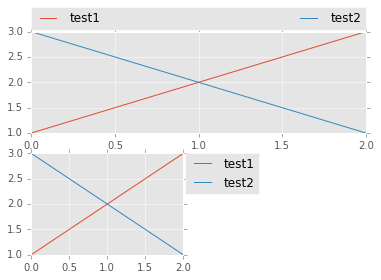

In [150]:
plt.subplot(211)
plt.plot([1,2,3], label="test1")
plt.plot([3,2,1], label="test2")
# Place a legend above this legend, expanding itself to
# fully use the given bounding box.
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)

plt.subplot(223)
plt.plot([1,2,3], label="test1")
plt.plot([3,2,1], label="test2")
# Place a legend to the right of this smaller figure.
plt.legend(bbox_to_anchor=(1.5, 0.8), loc=5, borderaxespad=0.)

plt.show()

# fill

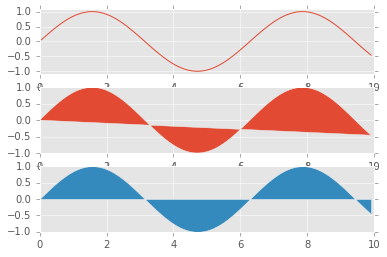

In [151]:
x = np.arange(0, 10, 0.1)
y = np.sin(x)
ax1 = plt.subplot(3, 1, 1)
ax1.set_ylim(-1.1, 1.1)
plt.plot(x, y)
ax2 = plt.subplot(3, 1, 2)
plt.fill(x, y)
ax3 = plt.subplot(3, 1, 3)
plt.fill_between(x, y, np.zeros(len(x)))

# scatter plot

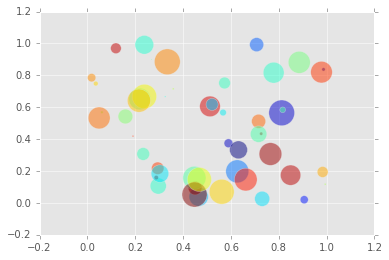

In [152]:
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radiuses

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

# histogram

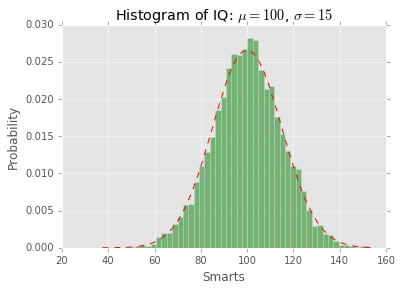

In [153]:

# example data
mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution
x = mu + sigma * np.random.randn(10000)

num_bins = 50
# the histogram of the data
n, bins, patches = plt.hist(x, num_bins, normed=1, facecolor='green', alpha=0.5)
# add a 'best fit' line
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

# image show

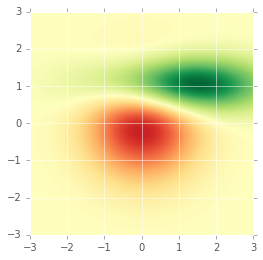

In [17]:

delta = 0.025
x = y = np.arange(-3.0, 3.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = mlab.bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)
Z2 = mlab.bivariate_normal(X, Y, 1.5, 0.5, 1, 1)
Z = Z2 - Z1  # difference of Gaussians

im = plt.imshow(Z, interpolation='bilinear', cmap=cm.RdYlGn,
                origin='lower', extent=[-3, 3, -3, 3],
                vmax=abs(Z).max(), vmin=-abs(Z).max())

plt.show()

# with error bar



50 50 100


<Container object of 3 artists>

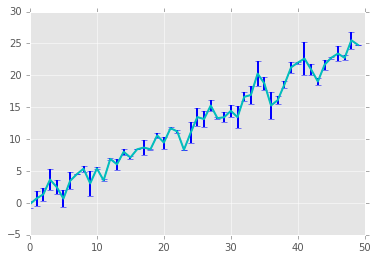

In [76]:
x = np.arange(0, 50)
y = np.sin(x) + np.random.randn(50) + x*0.5
err = np.random.randn(50)
print len(x), len(y), len(errorbar)
ax = plt.subplot(1, 1, 1)
plt.plot(x, y)
ax.errorbar(x, y, yerr=err, fmt='c-', ecolor='b', linewidth=2)

# Plot in 3D

## Plot line function

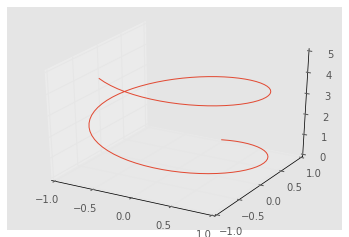

In [159]:
fig = plt.gcf()
t = np.arange(0, 10, 0.1)
x = np.sin(t)
y = np.cos(t)
z = t/2
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)

## scatter point

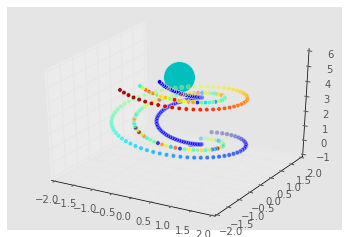

In [180]:
fig = plt.gcf()
ax= fig.add_subplot(111, projection='3d')
colors = np.random.randn(len(x))
colors2 = np.arange(len(x))

s1 = ax.scatter(x, y, z, c=colors)
s2 = ax.scatter(0, 0, 5, s=1000, c='c')
s1 = ax.scatter(x*1.5, y*1.5, z, c=colors2)
s3 = ax.scatter(x*0.5, y*0.5, z)

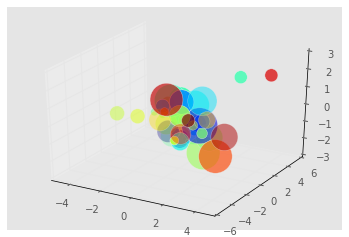

In [202]:
fig = plt.gcf()
ax= fig.add_subplot(111, projection='3d')
x = np.random.randn(50)
y = np.random.randn(50)
z = np.random.randn(50)
size = np.random.randn(50)*500
size = size.astype(int)

colors = np.random.randn(len(x))
colors2 = np.arange(len(x))

s1 = ax.scatter(x, y, z, c=colors, s=size)
s1 = ax.scatter(x*1.5, y*1.5, z, c=colors2, s=size)

## Surface plots


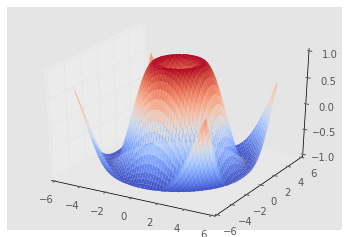

In [100]:
ax = plt.gcf().add_subplot(111, projection='3d')

X = np.arange(-5, 5, 0.2)
Y = np.arange(-5, 5, 0.2)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2+Y**2)
Z = np.sin(R)
sutf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, cstride=1, rstride=1, linewidth=0)

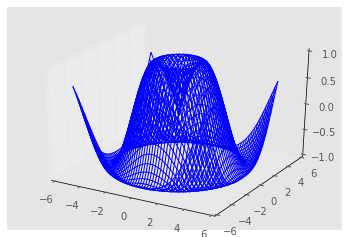

In [101]:
ax = plt.gcf().add_subplot(111, projection='3d')

ax.plot_wireframe(X, Y, Z, )

# Plot contour

In [102]:
X = np.arange(-np.pi*2, np.pi*2, 0.2)
Y = np.arange(0, np.pi*2, 0.2)
X, Y = np.meshgrid(X, Y)
R = X+Y**2
Z = R

[-10  -3   4  11  18  25  32  39]


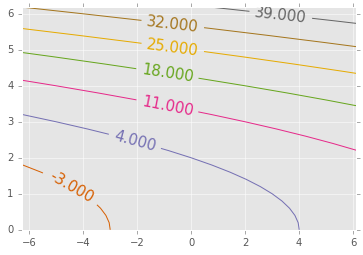

In [103]:
plt.subplot(111)
levels = np.arange(-10, 40, 7)
CS = plt.contour(X, Y, Z, levels, cmap=cm.Dark2)
plt.clabel(CS, inline=3, fontsize=15)
print levels